### Analysis from all the charts: ###

1.From the bubble plot it is very clear that both,the number of drivers and, the number of ridesare more in the
Urban area as compare to Suburban and the Rural area. 

2.In th pie charts below, we could see that 77 of the drivres are from Urban area and 68% of the rides take places there. Check pie charts: In the pie charts-"% of Total Fares By City_Types" and "% of Total Rides by the City-Type"
That means the people in Urban area are using more Pyber. Where as the people in the rural area hardly use it.

3 As a result of this, around 63% of the total fare is coming from Urban area, and least is from rural.

4.From the last pie chart "% of Average Fare by the city-type", we noticed that even though the number of rides and drivers are more in urban, ares, the average fare in Suburban and Rural area is higher than the Urban.

Prediction:
There is much scope for Pyber to increase their business in Suburban and rural area.
If they hire people to work in the area and expand their business, it will help to boost the economy of those rural or subrban cities which eventully will make Pyber mre profitablwe

In [2]:
# In this problem the objective is:

# to build a Bubble Plot that showcases the relationship between four key variables:
#  .Average Fare ($) Per City
#  .Total Number of Rides Per City
#  .Total Number of Drivers Per City
# and 
# to produce the pie plots to show 
# 1.% of Total Fares by City Type
# 2.% of Total Rides by City Type
# 3.% of Total Drivers by City Type


In [2]:
# Dependancies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
# Path to csv
ride_csv = "./ride_data.csv"
city_csv = "./city_data.csv"

In [4]:
# Reading csvs
city_df = pd.read_csv(city_csv)
ride_df = pd.read_csv(ride_csv)

In [5]:
# dropping duplicated cities
city_df = city_df.drop_duplicates('city')

In [6]:
city_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [7]:
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,1/16/2016 13:49,38.35,5.400000e+12
1,South Roy,1/02/2016 18:42,17.49,4.040000e+12
2,Wiseborough,1/21/2016 17:35,44.18,3.650000e+12
3,Spencertown,7/31/2016 14:53,6.87,2.240000e+12
4,Nguyenbury,7/09/2016 4:42,6.28,1.540000e+12


In [8]:
#merging two dataFrames on 'city'
merged_df = city_df.merge(ride_df, on = 'city')
merged_df = merged_df[["city","date","fare","ride_id","driver_count","type"]] # <---this is to get the desire order of columns
merged_df.head()

,city,date,fare,ride_id,driver_count,type
0,Kelseyland,8/19/2016 4:27,5.51,6.250000e+12,63,Urban
1,Kelseyland,4/17/2016 6:59,5.54,7.470000e+12,63,Urban
2,Kelseyland,5/04/2016 15:06,30.54,2.140000e+12,63,Urban
3,Kelseyland,1/25/2016 20:44,12.08,1.900000e+12,63,Urban
4,Kelseyland,8/09/2016 18:19,17.91,8.780000e+12,63,Urban


In [9]:
# Average Fare ($) Per City
# data.groupby(['col1', 'col2'])['col3'].mean()
avg_fare = merged_df.groupby(['city', 'type', 'driver_count']).fare.mean()
avg_fare.head()

city          type      driver_count
Alvarezhaven  Urban     21              23.928710
Alyssaberg    Urban     67              20.609615
Anitamouth    Suburban  16              37.315556
Antoniomouth  Urban     21              23.625000
Aprilchester  Urban     49              21.981579
Name: fare, dtype: float64

In [11]:
# Total Number of Rides Per City
ridesPerCity = merged_df.groupby(['city', 'type', 'driver_count']).ride_id.count()


In [12]:
city_rides_df = pd.DataFrame({
    "Average Fare": avg_fare,
    "Number of Rides": ridesPerCity
})
# df.reset_index(level=['tick', 'obs'])
city_rides_df.reset_index(level = ['city', 'type', 'driver_count'], inplace = True)
city_rides_df.head()

,city,type,driver_count,Average Fare,Number of Rides
0,Alvarezhaven,Urban,21,23.928710,31
1,Alyssaberg,Urban,67,20.609615,26
2,Anitamouth,Suburban,16,37.315556,9
3,Antoniomouth,Urban,21,23.625000,22
4,Aprilchester,Urban,49,21.981579,19


In [13]:
# Creating seperate DataFrames for "type" : Urban, Subarba and Rural using city_rides.df

urban_df = city_rides_df[(city_rides_df.type == 'Urban')]
suburban_df = city_rides_df[(city_rides_df.type == 'Suburban')]
rural_df = city_rides_df[(city_rides_df.type == 'Rural')]
#urban_df.head()

In [25]:
suburban_df.head()

,city,type,driver_count,Average Fare,Number of Rides
2,Anitamouth,Suburban,16,37.315556,9
6,Campbellport,Suburban,26,33.711333,15
7,Carrollbury,Suburban,4,36.606000,10
9,Clarkstad,Suburban,21,31.051667,12
10,Conwaymouth,Suburban,18,34.591818,11


In [15]:
#rural_df.head()

In [16]:
ur_avg = urban_df['Average Fare'].mean()
rur_avg = rural_df["Average Fare"].mean()
suburb_avg = suburban_df["Average Fare"].mean()

In [17]:
#color scheme dictionary and preview
color_scheme = {'Gold':'#FFD700', 'Light Sky Blue':'#87CEFA', 'Light Coral':'#F08080'}
plt.suptitle('Pyber Ride Sharing Data')
city_color = {'Urban': color_scheme['Gold'], 'Suburban': color_scheme['Light Sky Blue'], 'Rural': color_scheme['Light Coral']}

### Bubble plot that showcases the relationship between four key variables: ###

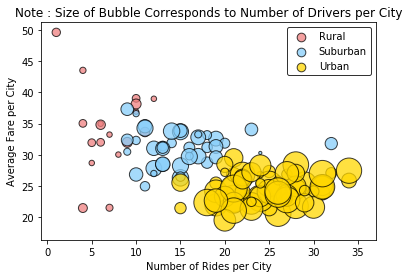

In [24]:
# Scatter plots of Number of rides Vs Avg Fare per city for type: Urban,Suburban,rural
# Size of the bubble corrroponds to the number of drivers.

plt.scatter(rural_df['Number of Rides'], rural_df['Average Fare'], s = rural_df['driver_count']*10, color = city_color['Rural'], edgecolor = 'black', label = 'Rural', alpha = .75)
plt.scatter(suburban_df['Number of Rides'], suburban_df['Average Fare'], s = suburban_df['driver_count']*10, color = city_color['Suburban'], edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(urban_df['Number of Rides'], urban_df['Average Fare'], s = urban_df['driver_count']*10, color = city_color['Urban'], edgecolor = 'black', label = 'Urban', alpha = .75)

plt.title('Note : Size of Bubble Corresponds to Number of Drivers per City')
plt.xlabel('Number of Rides per City')
plt.ylabel('Average Fare per City')
#plt.legend(handles = ["Rural","Suburban","Urban"])
lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

plt.show()

### % of Total Fares by City Type ###

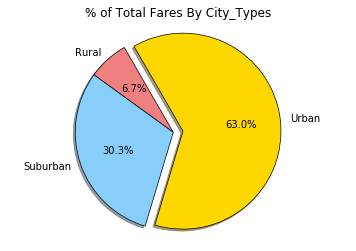

In [188]:
# Pie plots for: % of Total Fares by city-type

# Calculate Total Fare by city-type
total_fare = merged_df.groupby(['type']).fare.sum()

# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban" ]
# The colors of each section of the pie chart
colors = ["lightcoral","lightskyblue","Gold"]
explode = (0,0,0.1)
plt.title("% of Total Fares By City_Types")
plt.pie(total_fare,explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=120,wedgeprops={'linewidth':0.7,'edgecolor':'black'})
plt.axis("equal")
plt.savefig 
plt.show()

In [189]:
merged_df.groupby(['type']).fare.mean()
merged_df.head()

,city,date,fare,ride_id,driver_count,type
0,Kelseyland,8/19/2016 4:27,5.51,6.250000e+12,63,Urban
1,Kelseyland,4/17/2016 6:59,5.54,7.470000e+12,63,Urban
2,Kelseyland,5/04/2016 15:06,30.54,2.140000e+12,63,Urban
3,Kelseyland,1/25/2016 20:44,12.08,1.900000e+12,63,Urban
4,Kelseyland,8/09/2016 18:19,17.91,8.780000e+12,63,Urban


### % of Total Rides by City Type ###

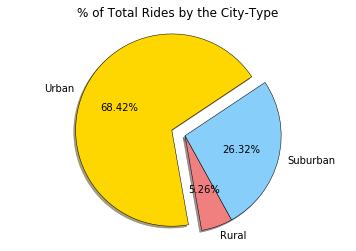

In [190]:
# Pie Chart for: % of Total Rides by the city-cype

# Calculate the total Number Of Rides by the city-type
total_rides_by_type = merged_df.groupby(['type']).ride_id.count()

labels = ["Rural","Suburban","Urban"]
colors = ["lightcoral","lightskyblue","Gold"]
explode =(0,0,0.15)
plt.title("% of Total Rides by the City-Type")
plt.pie(total_rides_by_type,labels=labels, explode=explode, colors=colors,autopct="%.2f%%", shadow=True, startangle=-80,wedgeprops={'linewidth':0.5,'edgecolor':'black'})
plt.axis('equal')
plt.savefig
plt.show()





### % of Total Drivers by City Type ####

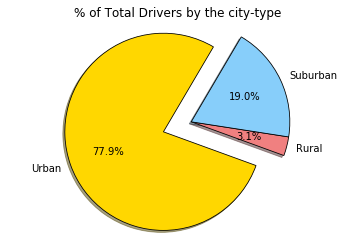

In [191]:
# Pie chart for: % of Total Drivers by the city-type

total_drivers = city_df.groupby(['type']).driver_count.sum()

plt.pie(total_drivers, labels=["Rural","Suburban","Urban"], 
                                        colors = ["lightcoral","lightskyblue","Gold"],
                                        explode =(0,0,0.3),
                                        autopct = "%1.1f%%",
                                        shadow = True, startangle= -20,
                                        wedgeprops={'linewidth':0.8,'edgecolor':'black'}
    
                                        )
plt.title( "% of Total Drivers by the city-type")

plt.axis('equal')
plt.savefig
plt.show()


### # % of Average fare by the city_type ###

In [247]:
# % of Average fare by the city_type

# Calculate Average Fare by city-type
#urb_avg = urban_df["Average Fare"].mean()
#suburb_avg = suburban_df["Average Fare"].mean()
#rur_avg = rural_df["Average Fare"].mean()
# Insteade of doing above three steps to find the avgs for urb,subrb and rural, you can do it in one step as follows

avg_fare_df = city_rides_df.groupby(['type'])['Average Fare'].mean()

plt.pie(avg_fare_df, labels=["Rural","Suburban","Urban"], 
                                        colors = ["lightcoral","lightskyblue","Gold"],
                                        explode =(0,0,0.15),
                                        autopct = "%1.1f%%",
                                        shadow = True, startangle= -20,
                                        wedgeprops={'linewidth':0.8,'edgecolor':'black'}
    
                                        )
plt.title( "% of Average Fare by the city-type")
plt.axis('equal')

avg_fare_df= pd.DataFrame(avg_fare_df)
avg_fare_df  


,Average Fare
type,
Rural,34.207143
Suburban,30.942131
Urban,24.603991


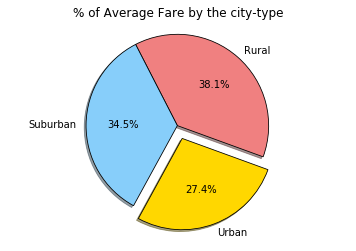

In [248]:
plt.savefig
plt.show()